In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("data_clean.csv")


In [28]:
df.shape

(73196, 38)

In [34]:
df.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT',
       'DISTRICT_CODE'],
      dtype='object')

In [30]:
df.sample(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT,DISTRICT_CODE
35022,A14006930783869194862,201812,1182000.0,4089.965398,289,4,2,0,1,0,...,0,1,0,1.032167,0.213520,1.080114,-3.703593,40.425861,Centro,3
32384,A4868985974550706485,201806,1462000.0,6168.776371,237,3,3,0,1,1,...,0,0,1,1.136897,0.342989,0.133829,-3.693129,40.422789,Centro,3
27791,A13459901369650445016,201812,127000.0,1175.925926,108,3,2,0,0,0,...,0,0,1,4.950400,1.568006,2.479663,-3.668914,40.380922,Puente de Vallecas,12
46586,A18441284031200023065,201806,156000.0,2052.631579,76,3,1,0,0,1,...,0,0,1,5.229683,0.317225,4.126393,-3.643159,40.407879,Moratalaz,11
35605,A17854471278372696665,201812,532000.0,3911.764706,136,3,2,1,1,1,...,0,0,1,2.003861,0.587401,2.062949,-3.718232,40.402338,Arganzuela,0
6984,A9314274418374615921,201803,108000.0,1367.088608,79,3,1,0,0,0,...,0,0,1,6.149364,0.377335,4.676994,-3.639708,40.390700,Puente de Vallecas,12
68822,A6156001454293066840,201812,326000.0,2037.500000,160,5,3,0,0,1,...,0,0,1,7.945667,0.490271,3.618765,-3.643836,40.471479,Hortaleza,8
25643,A12722592616185956645,201809,141000.0,1880.000000,75,4,2,1,0,0,...,0,0,1,5.720504,0.250800,5.355995,-3.757867,40.385851,Latina,9
72204,A6238776326178004253,201812,299000.0,3147.368421,95,2,2,0,1,1,...,0,0,1,11.180336,1.986397,9.571874,-3.576119,40.441936,San Blas,15
53591,A11498141188126002119,201812,362000.0,3261.261261,111,3,5,0,0,0,...,0,0,1,4.562012,0.464029,0.441016,-3.695274,40.457055,Tetuan,16


### Model Linear Regression

In [ ]:

# 1. Feature Selection

features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
    'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTRICT_CODE'
]

target = 'PRICE'

# 2. Data Splitting

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training and Evaluation

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# 5. Model Evaluation Metrics

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 142,189.22
R² Score: 0.7938


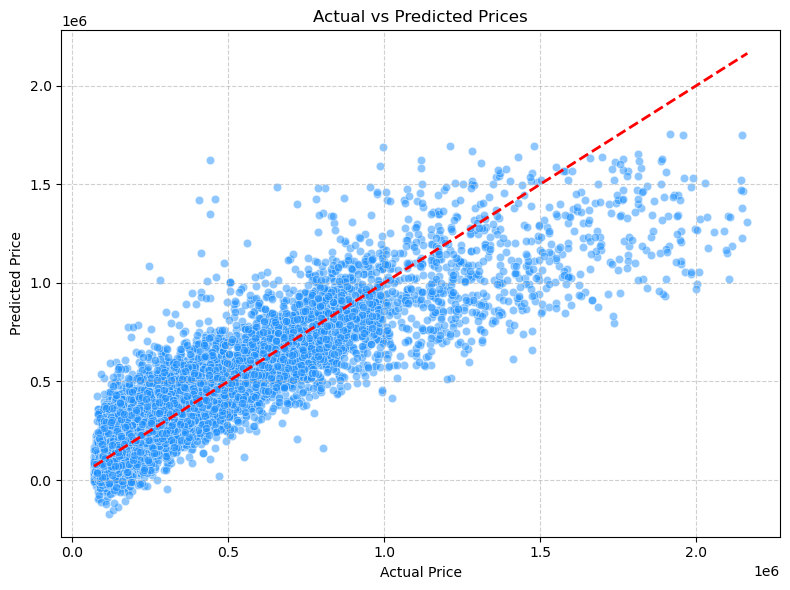

In [ ]:
# 6. Model Visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
    'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3'
]
target = 'PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:,.2f}")


cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores.mean()

print(f"Cross-validated RMSE (5 folds): {cv_rmse:,.2f}")

RMSE: 142,189.68
R² Score: 0.7937
MAE: 94,840.98
Cross-validated RMSE (5 folds): 144,881.59


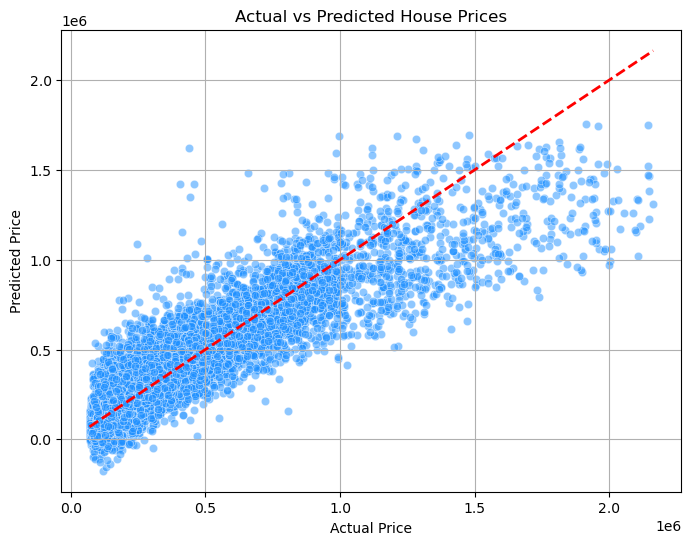

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # línea perfecta (y = y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

In [ ]:
error_pct = np.abs((y_test - y_pred) / y_test) * 100

bins = [-np.inf, 5, 10, 15, 20, 25, 50, 100, np.inf]
labels = ['<=5%', '<=10%', '<=15%', '<=20%', '<=25%', '<=50%', '<=100%', '>100%']

error_ranges = pd.cut(error_pct, bins=bins, labels=labels)

percentages = error_ranges.value_counts(normalize=True).sort_index() * 100

result_df = pd.DataFrame({
    'Error Range': percentages.index,
    'Percentage of Predictions': percentages.values
})

result_df

,Error Range,Percentage of Predictions
0,<=5%,11.714481
1,<=10%,11.372951
2,<=15%,10.976776
3,<=20%,10.211749
4,<=25%,8.524590
5,<=50%,26.939891
6,<=100%,15.095628
7,>100%,5.163934
